<ipython-input-7-f013d0a45911>:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect("equal", "datalim")


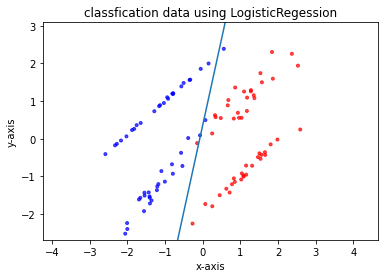

In [7]:
#로지스틱 회귀(선형 분리 가능한 데이터의 경계선을 학습을 통해 찾고 데이터를 분류하는 방법)

#모델 호출의 예
# from sklearn.linear_model import LogisticRegression

# #모델 구축
# model = LogisticRegression()

# #모델 학습시키기
# #train_data_detail은 데이터의 카테고리 예측에 사용되는 정보를 정리한 것
# #train_data_label은 데이터가 속하는 클래스의 라벨
# model.fit(train_data_detail, train_data_label)

# #모델 예측
# model.predict(data_detail)

# #모델 예측 결과의 정확도
# model.score(data_detail, data_true_label)


#로지스틱 회귀의 예
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

#페이지에서 직접 그래프를 볼 수 있게 함
%matplotlib inline

#데이터 생성
X, y = make_classification(n_samples=100, n_features = 2, n_redundant=0, random_state = 42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 42)

#모델 구축
model = LogisticRegression()

#trian_X, train_y를 사용하여 모델 학습 시키기
model.fit(train_X, train_y)

#test_X에 대한 모델의 분류 예측 결과 도출하기
model.predict(test_X)

#생성된 데이터 플롯하기
plt.scatter(X[:, 0], X[:, 1], c=y, marker=".", cmap = matplotlib.cm.get_cmap(name="bwr"), alpha=0.7)

#학습해서 도출한 식별 경계선 플롯하기
Xi = np.linspace(-10, 10)
Y = -model.coef_[0][0] / model.coef_[0][1] * \
Xi - model.intercept_ / model.coef_[0][1]
plt.plot(Xi, Y)

#그래프의 스케일 조정하기
plt.xlim(min(X[:, 0]) -0.1, max(X[:, 0])+0.5)
plt.ylim(min(X[:, 0]) -0.1, max(X[:, 0])+0.5)
plt.axes().set_aspect("equal", "datalim")

#그래프에 제목 설정
plt.title("classfication data using LogisticRegession")

# x축과 y축에 각각 이름 설정
plt.xlabel("x-axis")
plt.ylabel("y-axis")

plt.show()

1.0


<ipython-input-10-9d401c79d359>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().set_aspect("equal", "datalim")


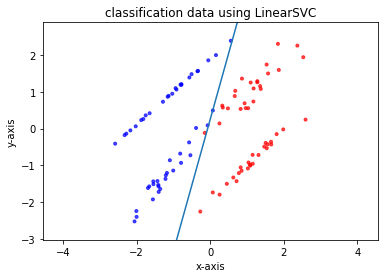

In [10]:
#선형 SVM
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

%matplotlib inline

#데이터 생성
X, y = make_classification(n_samples=100, n_features=2, n_redundant=0, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

#모델 구축
model = LinearSVC()

#train_X와 train_y를 사용해서 모델 학습시키기
model.fit(train_X, train_y)

#test_X, test_y를 이용한 모델의 정확도 출력
print(model.score(test_X, test_y))

#생성된 데이터 플롯하기
plt.scatter(X[:, 0], X[:, 1], c=y, marker =".", cmap=matplotlib.cm.get_cmap(name="bwr"), alpha=0.7)

#학습에서 도출한 식별 경계선 플롯하기
Xi = np.linspace(-10, 10)
Y = -model.coef_[0][0] / model.coef_[0][1] * Xi - model.intercept_ / model.coef_[0][1]
plt.plot(Xi, Y)

#그래프의 스케일 조정하기
plt.xlim(min(X[:, 0]) - 0.5, max(X[:, 0]) + 0.5)
plt.ylim(min(X[:, 1])-0.5, max(X[:, 1]) + 0.5)
plt.axes().set_aspect("equal", "datalim")

#그래프 제목 설정하기
plt.title("classification data using LinearSVC")

#x축과 y축 이름 설정하기
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.show()

In [14]:
#비선형 SVM

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_gaussian_quantiles

#데이터 생성
X, y = make_gaussian_quantiles(n_samples=1000, n_classes=2, n_features=2, random_state=42)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state = 42)

#모델 구축
model1 = SVC()
model2 = LinearSVC()

#train_X, train_X를 사용하여 모델 학습시키기
model1.fit(train_X, train_y)
model2.fit(train_X, train_y)

# 정확도 산출
print("비선형 SVM: {}".format(model1.score(test_X, test_y)))
print("선형 SVM: {}".format(model2.score(test_X, test_y)))

비선형 SVM: 0.976
선형 SVM: 0.528


In [32]:
#결정 트리

#버섯 데이터 가져오기
#필요한 패키지 import하기
import requests
import zipfile
from io import StringIO
import io
import pandas as pd

#데이터의 전처리에 필요한 패키지 import
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#uil 지정
mush_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
s = requests.get(mush_data_url).content

#데이터 형식을 변환하기
mush_data = pd.read_csv(io.StringIO(s.decode("utf-8")), header=None)

#데이터에 이름 붙이기(데이터를 쉽게 취급하기 위함)
mush_data.columns = ["classes", "cap_shape", "cap_surface", "cap_color", "odor", 
                     "bruises", "gill_attachment", "gill_spacing", "gill_size", "gill_color",
                    "stalk_shape", "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring",
                    "stalk_color_above_ring", "stalk_colot_below_ring", "veil_type",
                    "veil_color", "ring_number", "ring_type", "spore_print_color", "population", "habitat"]

#카테고리 변수(색상의 종류 등 숫자의 크고 작음을 결정할 수 없는 것)를 더미 특징량(yes 또는 no)로 변환하기
mush_data_dummy = pd.get_dummies(
    mush_data[["gill_color", "gill_attachment", "odor", "cap_color"]])

#종속변수: flg(플래스) 세우기
mush_data_dummy["flg"] = mush_data["classes"].map(lambda x:1 if x == "p" else 0)

#독립변수와 종속변수 지정하기
X = mush_data_dummy.drop("flg", axis = 1)
Y = mush_data_dummy["flg"]

#학습 데이터와 테스트 데이터로 나누기 
train_X, test_X, train_y, test_y = train_test_split(X, Y, random_state=42)

#모델 읽어 들이기
from sklearn.tree import DecisionTreeClassifier

#모델 구축하기
model = DecisionTreeClassifier()

#모델 학습시키기
model.fit(train_X, train_y)

#정확도 산출하기
print(model.score(test_X, test_y))

0.9094042343673068


In [34]:
#랜덤 포레스트

#버섯 데이터 가져오기
#필요한 패키지 import 하기
import requests
import zipfile
from io import StringIO
import io
import pandas as pd

#데이터의 전처리에 필요한 패키지 import 하기
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#url 지정하기
mush_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
s = requests.get(mush_data_url).content

# 데이터 형식 변환하기
mush_data = pd.read_csv(io.StringIO(s.decode("utf-8")), header=None)

#데이터에 이름 붙이기(데이터를 쉽게 취급하기 위함)
mush_data.columns = ["classes", "cap_shape", "cap_surface", "cap_color", "odor", 
                     "bruises", "gill_attachment", "gill_spacing", "gill_size", "gill_color",
                    "stalk_shape", "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring",
                    "stalk_color_above_ring", "stalk_colot_below_ring", "veil_type",
                    "veil_color", "ring_number", "ring_type", "spore_print_color", "population", "habitat"]

#카테고리 변수(색상의 종류 등 숫자의 크고 작음을 결정할 수 없는 것)를 더미 특징량(yes 또는 no)로 변환하기
mush_data_dummy = pd.get_dummies(
    mush_data[["gill_color", "gill_attachment", "odor", "cap_color"]])

#종속변수: flg(플래스) 세우기
mush_data_dummy["flg"] = mush_data["classes"].map(lambda x:1 if x == "p" else 0)

#독립변수와 종속변수 지정하기
X = mush_data_dummy.drop("flg", axis = 1)
Y = mush_data_dummy["flg"]

#학습 데이터와 테스트 데이터로 나누기 
train_X, test_X, train_y, test_y = train_test_split(X, Y, random_state=42)

#모델 읽어 들이기
from sklearn.ensemble import RandomForestClassifier

#모델 구축하기
model = RandomForestClassifier()

#모델 학습시키기
model.fit(train_X, train_y)

#정확도 산출하기
print(model.score(test_X, test_y))


0.9094042343673068


In [35]:
#k-NN

#버섯 데이터 가져오기
#필요한 패키지 import 하기
import requests
import zipfile
from io import StringIO
import io
import pandas as pd

#데이터의 전처리에 필요한 패키지 import 하기
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#url 지정하기
mush_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
s = requests.get(mush_data_url).content

# 데이터 형식 변환하기
mush_data = pd.read_csv(io.StringIO(s.decode("utf-8")), header=None)

#데이터에 이름 붙이기(데이터를 쉽게 취급하기 위함)
mush_data.columns = ["classes", "cap_shape", "cap_surface", "cap_color", "odor", 
                     "bruises", "gill_attachment", "gill_spacing", "gill_size", "gill_color",
                    "stalk_shape", "stalk_root", "stalk_surface_above_ring", "stalk_surface_below_ring",
                    "stalk_color_above_ring", "stalk_colot_below_ring", "veil_type",
                    "veil_color", "ring_number", "ring_type", "spore_print_color", "population", "habitat"]

#카테고리 변수(색상의 종류 등 숫자의 크고 작음을 결정할 수 없는 것)를 더미 특징량(yes 또는 no)로 변환하기
mush_data_dummy = pd.get_dummies(
    mush_data[["gill_color", "gill_attachment", "odor", "cap_color"]])

#종속변수: flg(플래스) 세우기
mush_data_dummy["flg"] = mush_data["classes"].map(lambda x:1 if x == "p" else 0)

#독립변수와 종속변수 지정하기
X = mush_data_dummy.drop("flg", axis = 1)
Y = mush_data_dummy["flg"]

#학습 데이터와 테스트 데이터로 나누기 
train_X, test_X, train_y, test_y = train_test_split(X, Y, random_state=42)

#모델 읽어들이기
from sklearn.neighbors import KNeighborsClassifier

#모델 구축하기
model = KNeighborsClassifier()

#모델 학습시키기
model.fit(train_X, train_y)

#정확도 표시하기
print(model.score(test_X, test_y))

0.9039881831610044


In [36]:
# 연습문제
# 데이터 셋을 무작위로 만들어 각 방식의 정확도 살펴보기
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassfier

#데이터 X, 라벨 y 생성하기(samples=1000, features-2, random_state=42)
X, y = make_classification(n_samples=100, n_features=2, random_state=42)

#학습 데이터와 테스트 데이터 나누기
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

#모델 구축하기
model_list = {'로지스틱 회귀':LogisticRegression(),
             '선형 SVM':LinearSVC(), 
             '비선형 SVM':SVC(),
             '결정 트리':DecisionTreeClassifier(),
             '랜덤 포레스트':RandomForestClassfier()}

#for 문으로 모델 학습시키고, 정확도 출력하기
for model_name, model in model_list.items():
    #모델 학습시키기
    model = fit(train_X, train_y)
    print(model_name)
    #정확도 출력하기
    print('정확도: '+str(model.score(test_X, test_y)))
    print()
    

ImportError: cannot import name 'RandomForestClassfier' from 'sklearn.ensemble' (C:\Users\HOME\anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)